In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as ss
from scipy.stats import f_oneway, norm
from collections import Counter
import math
from itertools import product

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay, recall_score, precision_score

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import statsmodels.api as sm
# from pycaret.classification import *

from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [60]:
df = pd.read_csv('/kaggle/input/vehicle-claim-fraud-detection/fraud_oracle.csv')

# EDA

In [61]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [63]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [64]:
for column in df:
    if column == 'PolicyNumber':
        pass
    else:
        print(column)
        print(sorted(df[column].unique()),"\n")

Month
['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonth
[1, 2, 3, 4, 5] 

DayOfWeek
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

Make
['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW'] 

AccidentArea
['Rural', 'Urban'] 

DayOfWeekClaimed
['0', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

MonthClaimed
['0', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonthClaimed
[1, 2, 3, 4, 5] 

Sex
['Female', 'Male'] 

MaritalStatus
['Divorced', 'Married', 'Single', 'Widow'] 

Age
[0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7

## Issue
- DayOfWeekClaimed, MonthClaimed, and Age contains a 0
- PolicyType is a concenation of VehicleCategory and BasePolicy
- PolicyNumber just a row number

In [65]:
# Check DayOfWeekClaimed == 0
df[df['DayOfWeekClaimed']=='0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,0,1517,15,400,2,more than 30,none,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [66]:
# Check MonthClaimed == 0
df[df['MonthClaimed']=='0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,0,1517,15,400,2,more than 30,none,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [67]:
# Check Age == 0
print(df[df['Age']==0].shape)
df[df['Age']==0].sample(3)

(320, 33)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
10786,Jul,2,Monday,Honda,Urban,Wednesday,Dec,5,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,0,10787,14,400,1,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1995,All Perils
11235,Mar,5,Thursday,Honda,Urban,Tuesday,Apr,1,Male,Single,0,Policy Holder,Sedan - Liability,Sport,more than 69000,0,11236,3,400,4,more than 30,more than 30,2 to 4,new,16 to 17,No,No,External,none,4 to 8 years,2 vehicles,1995,Liability
4812,Apr,2,Monday,Honda,Urban,Tuesday,Apr,2,Male,Single,0,Policy Holder,Sedan - Liability,Sport,more than 69000,0,4813,1,400,1,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Liability


In [68]:
df = df.drop(columns='PolicyNumber')

## Cleansing

In [69]:
# Drop DayOfWeekClaimed & MonthClaimed == 0, since the 0 in the same row and only one row, so we can drop it
df = df[~(df['MonthClaimed']=='0')]

In [70]:
# Analysis row with Age == 0
df[df['Age']==0]['AgeOfPolicyHolder'].unique() #Result = array(['16 to 17'], dtype=object)

# Because the row with Age == 0, only appear in row with AgeOfPolicyHolder == '16 to 17', i will impute with 16.5
df['Age'] =df['Age'].replace({0:16.5})

# Further Analysis

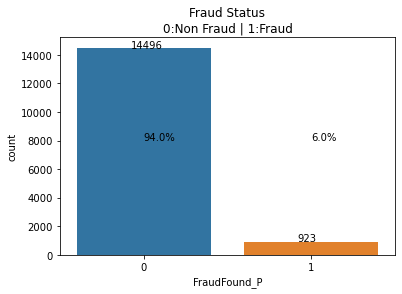

In [71]:
ax = sns.countplot(df['FraudFound_P'], 
                   order = df["FraudFound_P"].value_counts().index)

for p, label in zip(ax.patches, df["FraudFound_P"].value_counts().values):
    ax.annotate(label, (p.get_x()+0.320, p.get_height()))
    
ax.set_title('Fraud Status\n0:Non Fraud | 1:Fraud')
ax.text(0, 8000, f'{round(14496/len(df),2)*100}%')
ax.text(1, 8000, f'{round(923/len(df),2)*100}%')
plt.show()

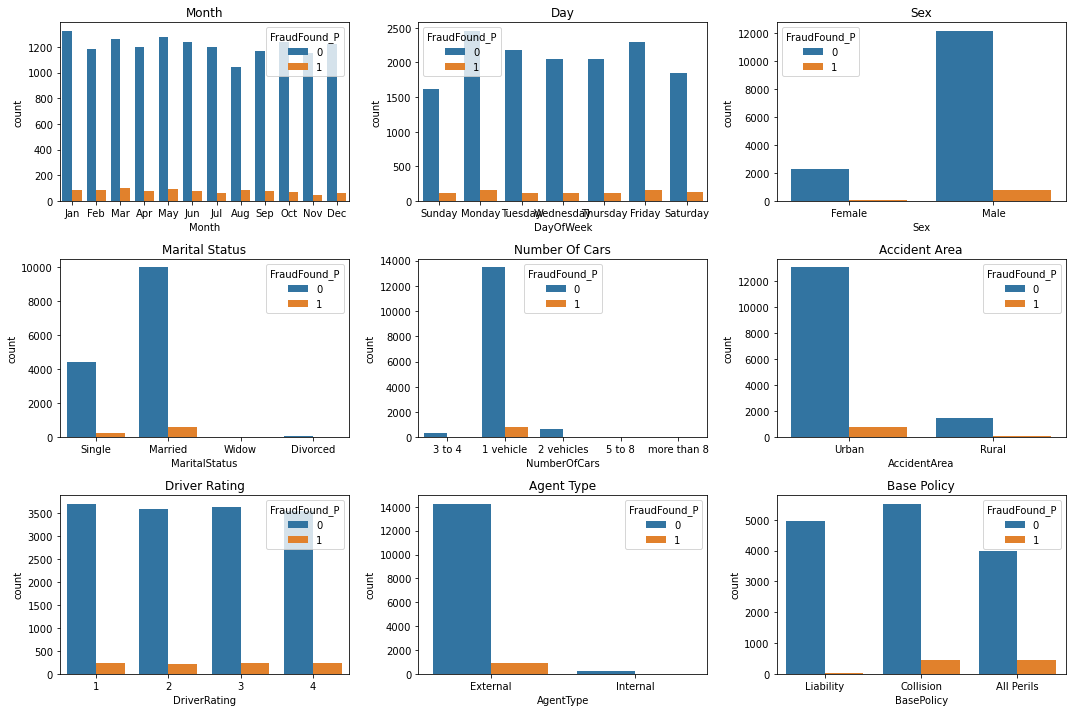

In [72]:
fig, ax = plt.subplots(3,3, figsize=(15,10))
sns.countplot(data=df, x='Month', hue='FraudFound_P', order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ax=ax[0][0])
ax[0][0].set_title('Month')

sns.countplot(data=df, x='DayOfWeek', hue='FraudFound_P', order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], ax=ax[0][1])
ax[0][1].set_title('Day')

sns.countplot(data=df, x='Sex', hue='FraudFound_P', ax=ax[0][2])
ax[0][2].set_title('Sex')

sns.countplot(data=df, x='MaritalStatus', hue='FraudFound_P', ax=ax[1][0])
ax[1][0].set_title('Marital Status')

sns.countplot(data=df, x='NumberOfCars', hue='FraudFound_P', ax=ax[1][1])
ax[1][1].set_title('Number Of Cars')

sns.countplot(data=df, x='AccidentArea', hue='FraudFound_P', ax=ax[1][2])
ax[1][2].set_title('Accident Area')

sns.countplot(data=df, x='DriverRating', hue='FraudFound_P', ax=ax[2][0])
ax[2][0].set_title('Driver Rating')

sns.countplot(data=df, x='AgentType', hue='FraudFound_P', ax=ax[2][1])
ax[2][1].set_title('Agent Type')

sns.countplot(data=df, x='BasePolicy', hue='FraudFound_P', ax=ax[2][2])
ax[2][2].set_title('Base Policy')


plt.tight_layout()

,PolicyType,FraudFound_P,Total Accidents,Percentage by PolicyType,Percentage by Total
0,Sedan - All Perils,411,4086,10.059,2.666
1,Sedan - Collision,384,5584,6.877,2.49
2,Sedan - Liability,36,4987,0.722,0.233
3,Sport - All Perils,0,22,0.0,0.0
4,Sport - Collision,48,348,13.793,0.311
5,Sport - Liability,0,1,0.0,0.0
6,Utility - All Perils,41,340,12.059,0.266
7,Utility - Collision,3,30,10.0,0.019
8,Utility - Liability,0,21,0.0,0.0
9,Column total,923,15419,53.51,5.985


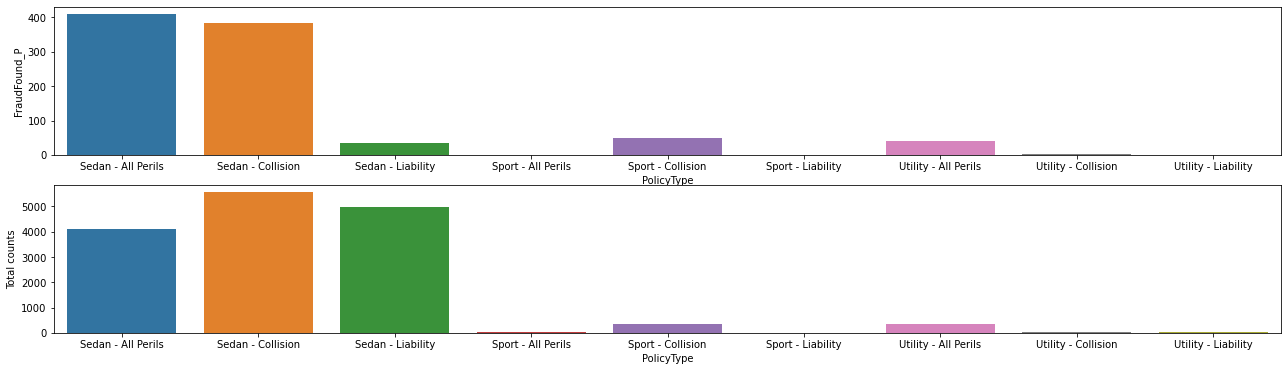

In [73]:
#plotting by FraudFound, looking to see if there are anything obvious that correlates to fraud
gpd_val1=df.groupby('PolicyType').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val2=df.groupby('PolicyType').agg('count').reset_index()

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(22, 6))
sns.barplot(x='PolicyType', y='FraudFound_P', data = gpd_val1, ax=ax1)
sns.barplot(x='PolicyType', y='FraudFound_P', data=gpd_val2, ax=ax2)

ax2.set(ylabel='Total counts')

None

total_list = pd.concat([gpd_val1, gpd_val2['FraudFound_P'].rename('Total Accidents')],axis=1)
total_list['Percentage by PolicyType']= round((total_list['FraudFound_P']/total_list['Total Accidents'])*100,3)
total_list['Percentage by Total'] = round((total_list['FraudFound_P']/sum(total_list['Total Accidents']))*100,3)

ax2.set(ylabel='Total counts')

data = [['Column total'],
        [sum(total_list['FraudFound_P'])], 
        [sum(total_list['Total Accidents'])], 
        [sum(total_list['Percentage by PolicyType'])], 
        [sum(total_list['Percentage by Total'])]]

nr = pd.DataFrame(data)

nr1 = nr.transpose()
nr1.rename(columns={0:'PolicyType',1:'FraudFound_P',2:'Total Accidents',3:'Percentage by PolicyType',4:'Percentage by Total'}, inplace=True)
pd.concat([total_list,nr1],ignore_index=True)

,VehicleCategory,FraudFound_P,Total Accidents,Percentage by VehicleCategory,Percentage by Total
0,Sedan,795,9670,8.221,5.156
1,Sport,84,5358,1.568,0.545
2,Utility,44,391,11.253,0.285
3,Column total,923,15419,21.042,5.986


,BasePolicy,FraudFound_P,Total Accidents,Percentage by BasePolicy,Percentage by Total
0,All Perils,452,4448,10.162,2.931
1,Collision,435,5962,7.296,2.821
2,Liability,36,5009,0.719,0.233
3,Column total,923,15419,18.177,5.985


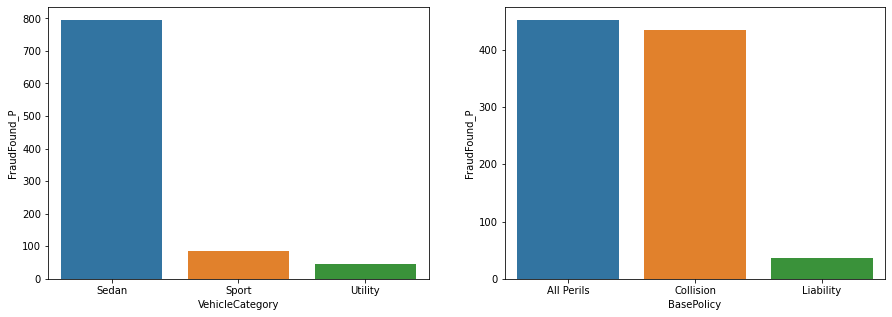

In [74]:
#plotting by FraudFound, looking to see if there are anything obvious that correlates to fraud
gpd_val1=df.groupby('VehicleCategory').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val6=df.groupby('VehicleCategory').agg('count').reset_index()
gpd_val3=df.groupby('BasePolicy').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val7=df.groupby('BasePolicy').agg('count').reset_index()

fig, (ax1, ax3) = plt.subplots(1,2,figsize=(15, 5))
sns.barplot(x='VehicleCategory', y='FraudFound_P', data = gpd_val1, ax=ax1)
#sns.barplot(x='VehicleCategory', y='FraudFound_P', data = gpd_val2, ax=ax2)
sns.barplot(x='BasePolicy', y='FraudFound_P', data = gpd_val3, ax=ax3)
#sns.barplot(x='BasePolicy', y='FraudFound_P', data = gpd_val4, ax=ax4)
None


total_list1 = pd.concat([gpd_val1, gpd_val6['FraudFound_P'].rename('Total Accidents')],axis=1)
total_list1['Percentage by VehicleCategory']= round((total_list1['FraudFound_P']/total_list1['Total Accidents'])*100,3)
total_list1['Percentage by Total'] = round((total_list1['FraudFound_P']/sum(total_list1['Total Accidents']))*100,3)

total_list2 = pd.concat([gpd_val3, gpd_val7['FraudFound_P'].rename('Total Accidents')],axis=1)
total_list2['Percentage by BasePolicy']= round((total_list2['FraudFound_P']/total_list2['Total Accidents'])*100,3)
total_list2['Percentage by Total'] = round((total_list2['FraudFound_P']/sum(total_list2['Total Accidents']))*100,3)

data1 = [['Column total'],
        [sum(total_list1['FraudFound_P'])], 
        [sum(total_list1['Total Accidents'])], 
        [sum(total_list1['Percentage by VehicleCategory'])], 
        [sum(total_list1['Percentage by Total'])]]

data2 = [['Column total'],
        [sum(total_list2['FraudFound_P'])], 
        [sum(total_list2['Total Accidents'])], 
        [sum(total_list2['Percentage by BasePolicy'])], 
        [sum(total_list2['Percentage by Total'])]]

nr1 = pd.DataFrame(data1)
nr1 = nr1.transpose()
nr1.rename(columns={0:'VehicleCategory',1:'FraudFound_P',2:'Total Accidents',3:'Percentage by VehicleCategory',4:'Percentage by Total'}, inplace=True)
tl1=pd.concat([total_list1,nr1],ignore_index=True)

nr2 = pd.DataFrame(data2)
nr2 = nr2.transpose()
nr2.rename(columns={0:'BasePolicy',1:'FraudFound_P',2:'Total Accidents',3:'Percentage by BasePolicy',4:'Percentage by Total'}, inplace=True)
tl2=pd.concat([total_list2,nr2],ignore_index=True)

# print(tabulate(tl1, headers=tl1.columns))
# print(' ')
# print(tabulate(tl2, headers=tl2.columns))
display(tl1)
display(tl2)

,Make,FraudFound_P,Total Accidents,Percentage by Make,Percentage by Total
0,Accura,59,472,12.5,0.383
1,BMW,1,15,6.667,0.006
2,Chevrolet,94,1681,5.592,0.61
3,Dodge,2,109,1.835,0.013
4,Ferrari,0,2,0.0,0.0
5,Ford,33,450,7.333,0.214
6,Honda,179,2800,6.393,1.161
7,Jaguar,0,6,0.0,0.0
8,Lexus,0,1,0.0,0.0
9,Mazda,123,2354,5.225,0.798


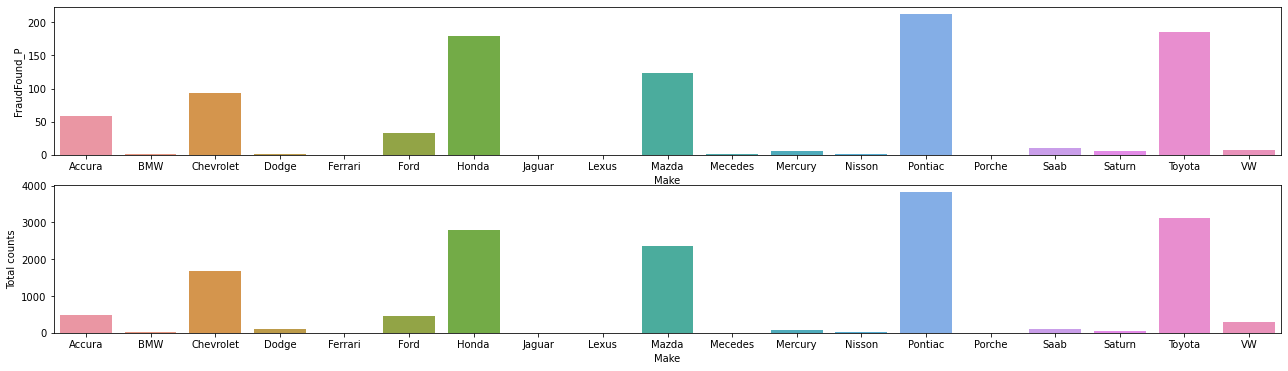

In [75]:
#plotting by FraudFound, looking to see if there are anything obvious that correlates to fraud
gpd_val1=df.groupby('Make').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val2=df.groupby('Make').agg('count').reset_index()

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(22, 6))
sns.barplot(x='Make', y='FraudFound_P', data = gpd_val1,ax=ax1)
sns.barplot(x='Make', y='FraudFound_P', data = gpd_val2,ax=ax2)

total_list = pd.concat([gpd_val1, gpd_val2['FraudFound_P'].rename('Total Accidents')],axis=1)
total_list['Percentage by Make']= round((total_list['FraudFound_P']/total_list['Total Accidents'])*100,3)
total_list['Percentage by Total'] = round((total_list['FraudFound_P']/sum(total_list['Total Accidents']))*100,3)

ax2.set(ylabel='Total counts')

data = [['Column total'],
        [sum(total_list['FraudFound_P'])], 
        [sum(total_list['Total Accidents'])], 
        [sum(total_list['Percentage by Make'])], 
        [sum(total_list['Percentage by Total'])]]

nr = pd.DataFrame(data)

nr1 = nr.transpose()
nr1.rename(columns={0:'Make',1:'FraudFound_P',2:'Total Accidents',3:'Percentage by Make',4:'Percentage by Total'}, inplace=True)
pd.concat([total_list,nr1],ignore_index=True)

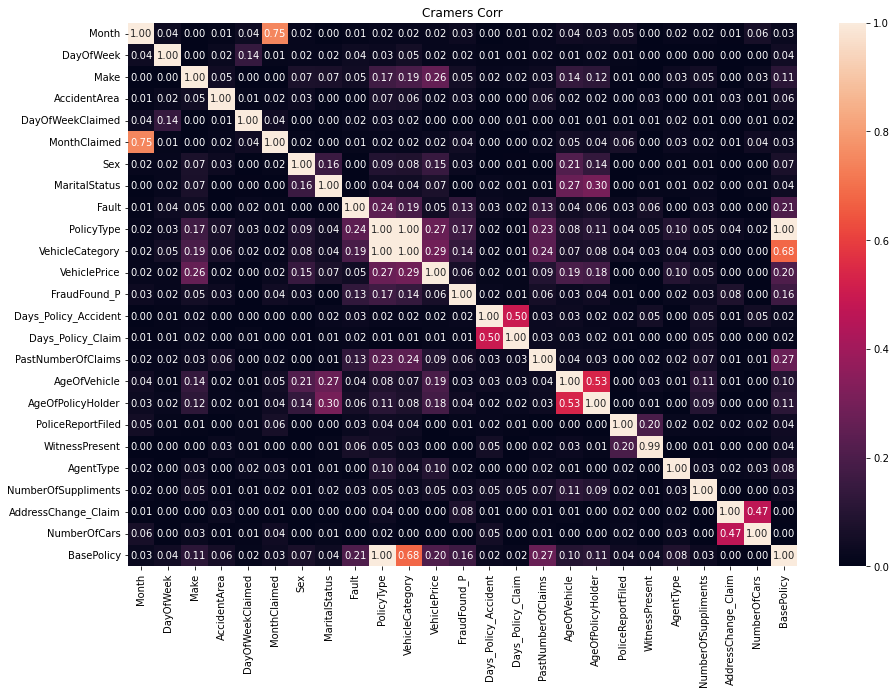

In [76]:
# Correlation Between Categorial & Target
ob=[]
for data in df.columns:
    if data == 'FraudFound_P':
        ob.append(data)
    if df[data].dtype=='object':
        ob.append(data)
        
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

cramers_df = pd.DataFrame(index=ob)

for x in ob:
    a = []
    for y in ob:
        a.append(cramers_v(df[y], df[x]))
    cramers_df[x] = a


plt.figure(figsize=(15,10))
sns.heatmap(cramers_df, annot=True, fmt='.2f')
plt.title('Cramers Corr')
plt.show()

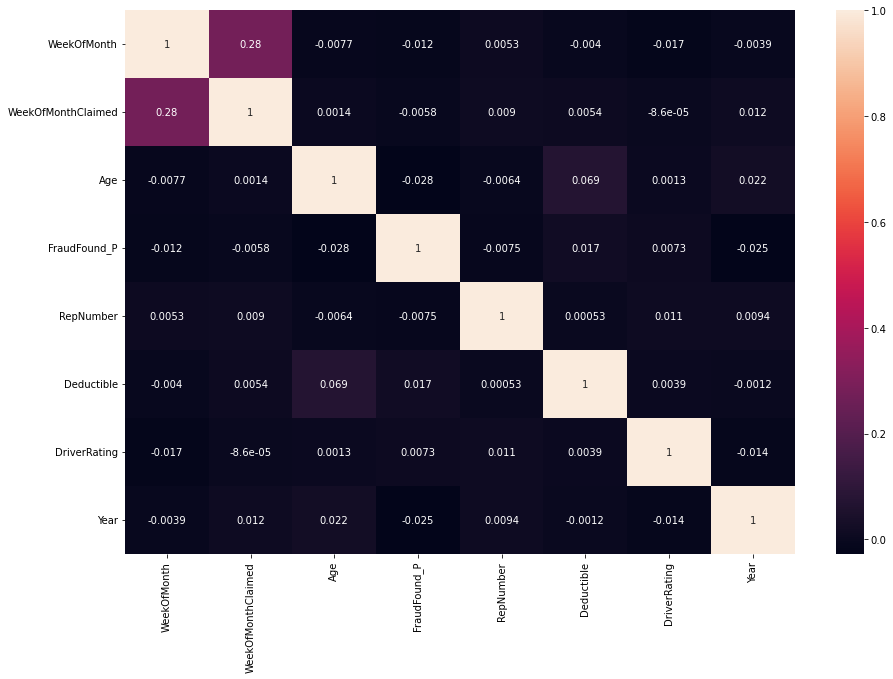

In [77]:
# Correlation Between Continous & Target
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Preprocessing

In [78]:
# Drop Policy Type
df = df.drop(columns='PolicyType')

## Encode Categorical Data

In [79]:
# df['AccidentArea'] = df['AccidentArea'].replace({'Urban':1, 'Rural':0})
# df['Sex'] = df['Sex'].replace({'Female':1, 'Male':0})
# df['Fault'] = df['Fault'].replace({'Policy Holder':1, 'Third Party':0})
# df['PoliceReportField'] = df['PoliceReportField'].replace({'Yes':1, 'No':0})
# df['WitnessPresent'] = df['WitnessPresent'].replace({'Yes':1, 'No':0})
# df['AgentType'] = df['AgentType'].replace({'External':1, 'Internal':0})
# df['Month'] = df['Month'].replace({'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})
# df['DayOfWeek'] = df['DayOfWeek'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})
# df['MonthClaimed'] = df['MonthClaimed'].replace({'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})
# df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})
# df['PastNumberOfClaims'] = df['PastNumberOfClaims'].replace({'none':0 ,'1':1,'2 to 4':2,'more than 4':3})
# df['NumberOfSuppliments'] = df['NumberOfSuppliments'].replace({'none':0,'1 to 2':1,'3 to 5':2,'more than 5':4})
# df['VehiclePrice'] = df['VehiclePrice'].replace({'less than 20000':0,'20000 to 29000':1,'30000 to 39000':2,
#                                                  '40000 to 59000':3,'60000 to 69000':4,'more than 69000':5})
# df['AgeOfVehicle'] = df['AgeOfVehicle'].replace({'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2})

In [80]:
col_ordering = [
    {'col':'AccidentArea','mapping':{'Urban':1, 'Rural':0}},
    {'col':'Sex','mapping':{'Female':1, 'Male':0}},
    {'col':'Fault','mapping':{'Policy Holder':1, 'Third Party':0}},
    {'col':'PoliceReportFiled','mapping':{'Yes':1, 'No':0}},
    {'col':'WitnessPresent','mapping':{'Yes':1, 'No':0}},
    {'col':'AgentType','mapping':{'External':1, 'Internal':0}},
    {'col':'Month','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'DayOfWeek','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'DayOfWeekClaimed','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'MonthClaimed','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'PastNumberOfClaims','mapping':{'none':0 ,'1':1,'2 to 4':2,'more than 4':3 }},
    {'col':'NumberOfSuppliments','mapping':{'none':0,'1 to 2':1,'3 to 5':2,'more than 5':3}}, 
    {'col':'VehiclePrice','mapping':{'less than 20000':0,'20000 to 29000':1,'30000 to 39000':2,
                                     '40000 to 59000':3,'60000 to 69000':4,'more than 69000':5}},
    {'col':'AgeOfVehicle','mapping':{'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2}},
    {'col':'Days_Policy_Accident','mapping':{'more than 30':4,'15 to 30':3,'none':0,'1 to 7':1,'8 to 15':2}},
    {'col':'Days_Policy_Claim','mapping':{'more than 30':4,'15 to 30':3,'none':0,'1 to 7':1,'8 to 15':2}},
    {'col':'AgeOfPolicyHolder','mapping':{'16 to 17':1,'18 to 20':2,'21 to 25':3,'26 to 30':4,'31 to 35':5,'36 to 40':6,
                                          '41 to 50':7,'51 to 65':8,'over 65':9}},
    {'col':'AddressChange_Claim','mapping':{'no change':0,'under 6 months':1,'1 year':2,'2 to 3 years':3,'4 to 8 years':4}},
    {'col':'NumberOfCars','mapping':{'1 vehicle':1,'2 vehicles':2,'3 to 4':3,'5 to 8':4,'more than 8':5}}
]
ord_encoder = OrdinalEncoder(mapping = col_ordering, return_df=True)

In [81]:
df2 = ord_encoder.fit_transform(df)

In [82]:
OHE = OneHotEncoder(cols = ['Make','MaritalStatus','VehicleCategory','BasePolicy'],use_cat_names=True, return_df=True) 
df3 = OHE.fit_transform(df2)

In [83]:
df3.head()

,Month,WeekOfMonth,DayOfWeek,Make_Honda,Make_Toyota,Make_Ford,Make_Mazda,Make_Chevrolet,Make_Pontiac,Make_Accura,Make_Dodge,Make_Mercury,Make_Jaguar,Make_Nisson,Make_VW,Make_Saab,Make_Saturn,Make_Porche,Make_BMW,Make_Mecedes,Make_Ferrari,Make_Lexus,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus_Single,MaritalStatus_Married,MaritalStatus_Widow,MaritalStatus_Divorced,Age,Fault,VehicleCategory_Sport,VehicleCategory_Utility,VehicleCategory_Sedan,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy_Liability,BasePolicy_Collision,BasePolicy_All Perils
0,12,5,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,1,0,0,0,21.0,1,1,0,0,5,0,12,300,1,4,4,0,3,4,0,0,1,0,2,3,1994,1,0,0
1,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,4,0,1,0,0,0,34.0,1,1,0,0,5,0,15,400,4,4,4,0,6,5,1,0,1,0,0,1,1994,0,1,0
2,10,5,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,11,2,0,0,1,0,0,47.0,1,1,0,0,5,0,7,400,3,4,4,1,7,7,0,0,1,0,0,1,1994,0,1,0
3,6,2,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,7,1,0,0,1,0,0,65.0,0,1,0,0,1,0,4,400,2,4,4,1,8,8,1,0,1,3,0,1,1994,1,0,0
4,1,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,1,1,0,0,0,27.0,0,1,0,0,5,0,3,400,1,4,4,0,5,5,0,0,1,0,0,1,1994,0,1,0


In [84]:
cat_var_prod = list(product(df3.columns,df3.columns, repeat = 1))

## Creating an empty variable and picking only the p value from the output of Chi-Square test
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                                df3[i[0]], df3[i[1]])))[1]))
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])

In [85]:
chi_test_output2 = chi_test_output[chi_test_output['var1']=='FraudFound_P'].sort_values('coeff').reset_index(drop=True)
def rej_acc(x):
    if x > 0.05:
        Ho = 'A_H0'
    else:
        Ho = 'R_H0'
    return Ho

chi_test_output2['result'] = chi_test_output2['coeff'].apply(rej_acc)
chi_test_output2

,var1,var2,coeff,result
0,FraudFound_P,BasePolicy_Liability,3.116620e-81,R_H0
1,FraudFound_P,VehicleCategory_Sport,1.208553e-63,R_H0
2,FraudFound_P,Fault,1.406180e-59,R_H0
3,FraudFound_P,VehicleCategory_Sedan,9.021607e-52,R_H0
4,FraudFound_P,BasePolicy_All Perils,8.400805e-44,R_H0
5,FraudFound_P,AddressChange_Claim,9.704718e-22,R_H0
6,FraudFound_P,Deductible,1.302831e-15,R_H0
7,FraudFound_P,VehiclePrice,2.888324e-13,R_H0
8,FraudFound_P,PastNumberOfClaims,1.405198e-11,R_H0
9,FraudFound_P,Make_Accura,2.516880e-09,R_H0


# Split Data

In [86]:
X = df3.drop(columns='FraudFound_P')
y = df3['FraudFound_P']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48, stratify=y)

In [88]:
y_train.value_counts()

0    11597
1      738
Name: FraudFound_P, dtype: int64

# Model Function

In [89]:
modelname, acc, recall, precision, f1, roc_auc = [],[],[],[],[],[]
model = {'xgboost':XGBClassifier(use_label_encoder=False, objective= 'binary:logistic',eval_metric='aucpr'), 
         'LightGBM':LGBMClassifier(is_unbalance=True),
         'dt': DecisionTreeClassifier(),
         'rf':RandomForestClassifier(),
         'blf':BalancedRandomForestClassifier(),
          'adaboost':AdaBoostClassifier(), 
          'gradientb':GradientBoostingClassifier(),
         'mlp':MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32, 16, 8), max_iter=300,activation = 'relu',solver='adam',random_state=1),
         
         
        }

def fit_model(x_train, x_test, y_train, y_test, sampling):
    for key,value in zip(model, model.values()):
        print(f"Model {key} {sampling}")
        ml_model = value
        ml_model.fit(x_train, y_train)
        y_pred = ml_model.predict(x_test)
        
        modelname.append(f'{key} {sampling}')
        acc.append(accuracy_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        roc_auc.append(roc_auc_score(y_test, y_pred))

def sampling(x_train, y_train, kind='over', ss=0.5):
    if kind == 'over':
        oversample = SMOTE(sampling_strategy=ss)
        X, y = oversample.fit_resample(x_train, y_train)
    elif kind == 'under':
        join_train = pd.concat([x_train, y_train], axis=1)
        claim = join_train[join_train['FraudFound_P']==1]
        no_claim = join_train[join_train['FraudFound_P']==0]

        undersample_noclaim = no_claim.sample(len(claim)*3)
        join_train2 = pd.concat([claim,undersample_noclaim]).sample(frac=1)

        X = join_train2.drop(columns='FraudFound_P')
        y = join_train2['FraudFound_P']
    return X, y

def metric_result(y_test, y_pred):
    print("F1 Score : ",f1_score(y_test, y_pred, average='binary'))
    print("Recall Score : ",recall_score(y_test, y_pred))
    print("Precision Score : ",precision_score(y_test, y_pred))

    ig, ax = plt.subplots(1,2, figsize=(10,5))
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax[0])
    ax[0].set_title('Confusion Matrix')

    # ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    ax[1].plot(fpr,tpr, label="AUC="+str(auc))
    ax[1].set_title('ROC AUC')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].legend(loc=4)
    plt.show()

def glm_result(res, X_test, y_test):
    X_test_sm = sm.add_constant(X_test)
    y_pred = res.predict(X_test_sm)

    df_res = pd.DataFrame({'is_claim_real':y_test, 'is_claim_prob':y_pred})
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df_res[i]= df_res.is_claim_prob.map(lambda x: 1 if x > i else 0)
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

    cut_off = [0.0,0.05, 0.1, 0.15 , 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
    f1_result = []
    for i in cut_off:
        df_res['final_predicted'] = df_res['is_claim_prob'].map( lambda x: 1 if x > i else 0)
        f1_result.append(roc_auc_score(df_res['is_claim_real'], df_res['final_predicted']))
    df_res2 = pd.DataFrame({'cut_off':cut_off, 'f1_score':f1_result})
    best_tresh = df_res2.sort_values('f1_score', ascending=False).head(1)['cut_off'].values[0]
    y_pred_thresh = (y_pred >= best_tresh).astype('float')
    print('Best Threshold :', best_tresh)
    metric_result(y_test, y_pred_thresh)

def find_best_tresh(pred_proba, y_test):
    df_res = pd.DataFrame({'prob':pred_proba})
    cut_off = [0.0,0.05, 0.1, 0.15 , 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
    f1_result = []
    for i in cut_off:
        df_res['final_predicted'] = df_res['prob'].map( lambda x: 1 if x > i else 0)
        f1_result.append(roc_auc_score(y_test, df_res['final_predicted']))
    df_res2 = pd.DataFrame({'cut_off':cut_off, 'f1_score':f1_result})
    best_tresh = df_res2.sort_values('f1_score', ascending=False).head(1)['cut_off'].values[0]
    y_pred_thresh = (y_pred >= best_tresh).astype('float')
    print('Best Threshold :', best_tresh)
    metric_result(y_test, y_pred_thresh)
    
    
#     matriz(y_pred_thresh, best_tresh)

# Oversampling

In [90]:
oversample = SMOTE(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(X_train, y_train)
print('After Oversampling:\n',y_over.value_counts())

After Oversampling:
 0    11597
1     5798
Name: FraudFound_P, dtype: int64


In [91]:
fit_model(X_over, X_test, y_over, y_test, 'over')

Model xgboost over
Model LightGBM over
Model dt over
Model rf over
Model blf over
Model adaboost over
Model gradientb over
Model mlp over


# Undersampling

In [92]:
join_train = pd.concat([X_train, y_train], axis=1)
claim = join_train[join_train['FraudFound_P']==1]
no_claim = join_train[join_train['FraudFound_P']==0]

undersample_noclaim = no_claim.sample(len(claim)*2)
join_train2 = pd.concat([claim,undersample_noclaim]).sample(frac=1)

print("Before Undersample:\n", join_train['FraudFound_P'].value_counts())
print("After Undersample:\n", join_train2['FraudFound_P'].value_counts())

X_under = join_train2.drop(columns='FraudFound_P')
y_under = join_train2['FraudFound_P']

Before Undersample:
 0    11597
1      738
Name: FraudFound_P, dtype: int64
After Undersample:
 0    1476
1     738
Name: FraudFound_P, dtype: int64


In [93]:
fit_model(X_under, X_test, y_under, y_test, 'Under')

Model xgboost Under
Model LightGBM Under
Model dt Under
Model rf Under
Model blf Under
Model adaboost Under
Model gradientb Under
Model mlp Under


# Without Over/Under Sampling

In [94]:
fit_model(X_train, X_test, y_train, y_test, 'Normal')

Model xgboost Normal
Model LightGBM Normal
Model dt Normal
Model rf Normal
Model blf Normal
Model adaboost Normal
Model gradientb Normal
Model mlp Normal


In [95]:
df_model = pd.DataFrame({'model':modelname, 'accuracy':acc, 'recall':recall, 'precision':precision, 'f1':f1, 'roc_auc':roc_auc})

In [96]:
df_model

,model,accuracy,recall,precision,f1,roc_auc
0,xgboost over,0.932879,0.135135,0.347222,0.194553,0.559461
1,LightGBM over,0.921206,0.227027,0.295775,0.256881,0.596266
2,dt over,0.885863,0.270270,0.187266,0.221239,0.597708
3,rf over,0.936770,0.037838,0.291667,0.066986,0.515987
4,blf over,0.918288,0.151351,0.227642,0.181818,0.559291
5,adaboost over,0.915045,0.108108,0.170940,0.132450,0.537324
6,gradientb over,0.923800,0.081081,0.187500,0.113208,0.529330
7,mlp over,0.937419,0.021622,0.250000,0.039801,0.508741
8,xgboost Under,0.811933,0.621622,0.184000,0.283951,0.722849
9,LightGBM Under,0.743839,0.751351,0.157418,0.260300,0.747356


# Hypertuning Model 1

In [97]:
X_over, y_over = sampling(X_train, y_train, 'over', 0.5)
X_under, y_under = sampling(X_train, y_train, 'under', 0.5)

## 1. XGBoost

In [98]:
params = {
            'n_estimators':[300], #300
          'max_depth':[7], #7
          'learning_rate':[0.1] #0.1
         }
skf = RepeatedStratifiedKFold(n_splits=3)
xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic',eval_metric='auc')

grid_search = GridSearchCV(estimator=xgb, param_grid=params, scoring='f1', cv=skf)
grid_search.fit(X_under, y_under)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=None, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     i...
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     m

In [99]:
grid_search.best_score_

0.5228788885035969

<AxesSubplot:>

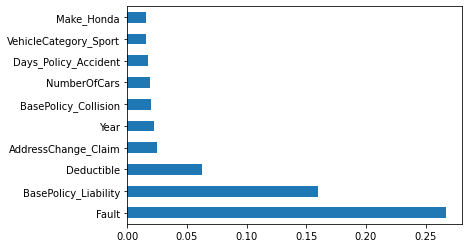

In [100]:
feat_importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False).head(10).plot(kind='barh')

F1 Score :  0.29112081513828236
Recall Score :  0.5405405405405406
Precision Score :  0.199203187250996


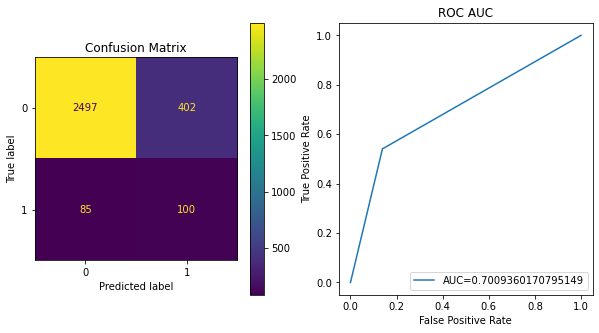

In [101]:
y_pred = grid_search.predict(X_test)
metric_result(y_test, y_pred)

## 2. LightGBM

In [102]:
params = {
          'boosting_type':['gbdt'],#300
          'n_estimators':[150],
          'num_leaves':[32], #7
          'learning_rate':[0.02] #0.1
         }
skf = RepeatedStratifiedKFold(n_splits=3)
lgbm = LGBMClassifier(objective= 'binary', class_weight='balanced')

grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=params, scoring='f1', cv=skf)
grid_search_lgbm.fit(X_under, y_under)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=LGBMClassifier(class_weight='balanced',
                                      objective='binary'),
             param_grid={'boosting_type': ['gbdt'], 'learning_rate': [0.02],
                         'n_estimators': [150], 'num_leaves': [32]},
             scoring='f1')

In [103]:
grid_search_lgbm.best_score_

0.612709647694362

In [104]:
grid_search_lgbm.best_params_

{'boosting_type': 'gbdt',
 'learning_rate': 0.02,
 'n_estimators': 150,
 'num_leaves': 32}

<AxesSubplot:>

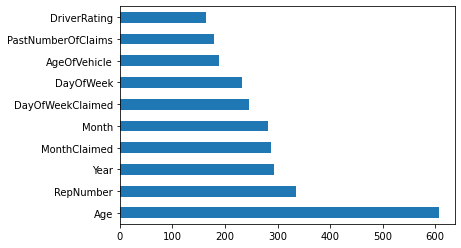

In [105]:
feat_importances = pd.Series(grid_search_lgbm.best_estimator_.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False).head(10).plot(kind='barh')

F1 Score :  0.24308588064046585
Recall Score :  0.9027027027027027
Precision Score :  0.1404541631623213


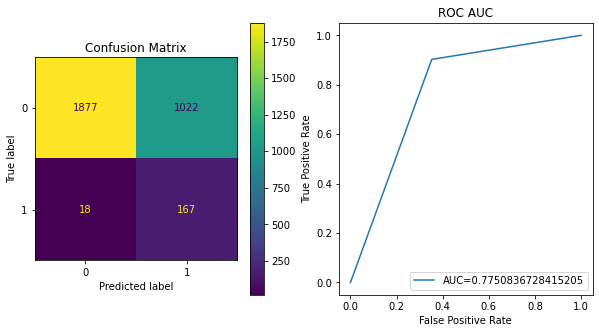

In [106]:
y_pred = grid_search_lgbm.predict(X_test)
metric_result(y_test, y_pred)

## 3. Decision Tree Classifier

In [107]:
params = {
          'criterion':['gini', 'entropy', 'log_loss'],#300
          'splitter':['best','random'],
          'min_samples_split':[2,3,4,5],
          'max_features':['','auto', 'sqrt', 'log2']
         }
skf = RepeatedStratifiedKFold(n_splits=3)
dt = DecisionTreeClassifier(class_weight='balanced')

grid_search_dt = GridSearchCV(estimator=dt, param_grid=params, scoring='f1', cv=skf)
grid_search_dt.fit(X_under, y_under)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['', 'auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [108]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_split': 4,
 'splitter': 'random'}

In [109]:
grid_search_dt.best_score_

0.4850919117125995

<AxesSubplot:>

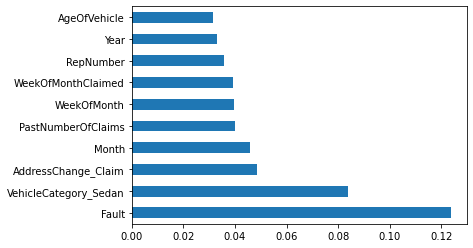

In [110]:
feat_importances = pd.Series(grid_search_dt.best_estimator_.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False).head(10).plot(kind='barh')

F1 Score :  0.20915032679738563
Recall Score :  0.6054054054054054
Precision Score :  0.12641083521444696


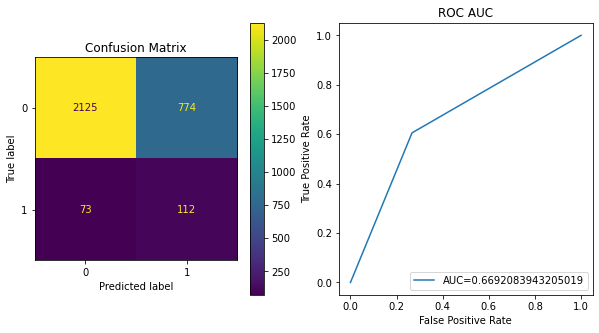

In [111]:
y_pred = grid_search_dt.predict(X_test)
metric_result(y_test, y_pred)

## 4. Random Forest

In [112]:
params = {
          'n_estimators':[200],
          'criterion':['gini'],
          'min_samples_split':[3],
          'min_samples_leaf':[3],
         }
skf = RepeatedStratifiedKFold(n_splits=3)
rf = RandomForestClassifier(class_weight='balanced')

grid_search_rf = GridSearchCV(estimator=rf, param_grid=params, scoring='f1', cv=skf)
grid_search_rf.fit(X_under, y_under)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini'], 'min_samples_leaf': [3],
                         'min_samples_split': [3], 'n_estimators': [200]},
             scoring='f1')

In [113]:
grid_search_rf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 200}

In [114]:
grid_search_rf.best_score_

0.5652087053521287

<AxesSubplot:>

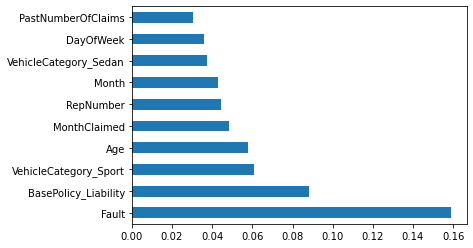

In [115]:
feat_importances = pd.Series(grid_search_rf.best_estimator_.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False).head(10).plot(kind='barh')

F1 Score :  0.25672877846790887
Recall Score :  0.6702702702702703
Precision Score :  0.1587708066581306


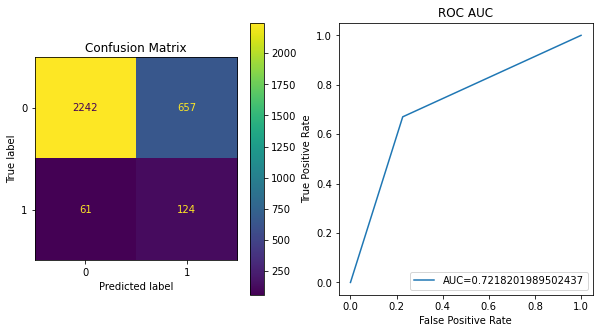

In [116]:
y_pred = grid_search_rf.predict(X_test)
metric_result(y_test, y_pred)

## 5. Balanced Random Forest

In [117]:
params = {
          'n_estimators':[300],
          'criterion':['gini'],
          'min_samples_split':[3],
          'min_samples_leaf':[3],
          'max_features':['log2']
         }
skf = RepeatedStratifiedKFold(n_splits=3)
brf = BalancedRandomForestClassifier(class_weight='balanced')

grid_search_brf = GridSearchCV(estimator=rf, param_grid=params, scoring='f1', cv=skf)
grid_search_brf.fit(X_under, y_under)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini'], 'max_features': ['log2'],
                         'min_samples_leaf': [3], 'min_samples_split': [3],
                         'n_estimators': [300]},
             scoring='f1')

In [118]:
grid_search_brf.best_params_

{'criterion': 'gini',
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 300}

In [119]:
grid_search_brf.best_score_

0.5693898959875718

<AxesSubplot:>

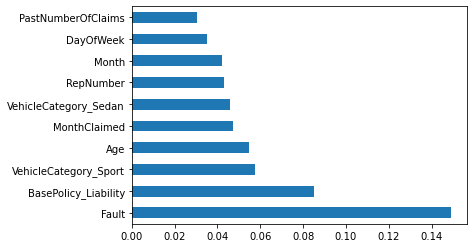

In [120]:
feat_importances = pd.Series(grid_search_brf.best_estimator_.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False).head(10).plot(kind='barh')

F1 Score :  0.25360230547550433
Recall Score :  0.7135135135135136
Precision Score :  0.1542056074766355


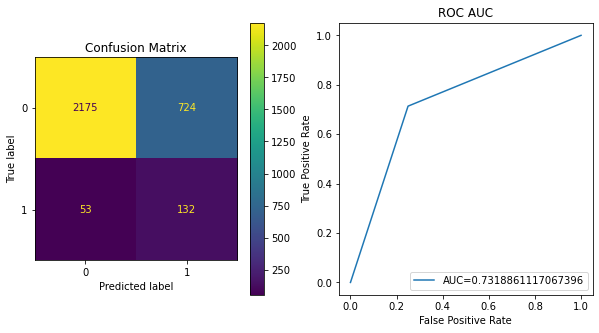

In [121]:
y_pred = grid_search_brf.predict(X_test)
metric_result(y_test, y_pred)

## 6. Neural Network

In [122]:
# def create_model(layers, neurons, lr):
#     model = Sequential()
#     for i in range(layers):
#         if i == 0:
#             model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
#         else:
#             model.add(Dense(neurons, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     opt = Adam(learning_rate=lr)
#     model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
#     return model

# model = KerasClassifier(build_fn=create_model, verbose=0)

# param_grid = {'layers': [1, 2, 3, 4, 5], 'neurons': [8, 16, 32, 64], 'lr':[0.001, 0.01, 0.02]}

# cv = RepeatedStratifiedKFold(n_splits=3)
# grid_search_nn = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='f1')

# grid_search_nn.fit(X_under, y_under)

In [123]:
# grid_search_nn.best_params_

In [124]:
# grid_search_nn.best_score_

In [125]:
# y_pred = grid_search_nn.predict(X_test)
# metric_result(y_test, y_pred)

## 7. GLM

Best Threshold : 0.05
F1 Score :  0.21382842509603073
Recall Score :  0.9027027027027027
Precision Score :  0.12127814088598403


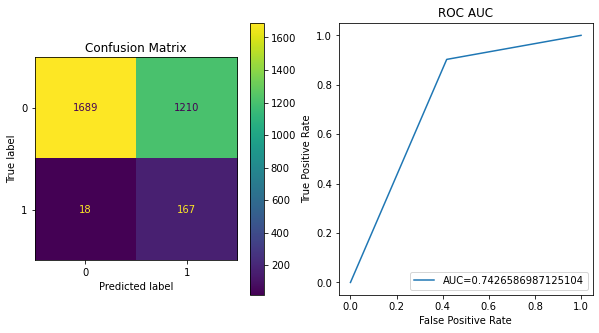

In [126]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Poisson())
res = logm1.fit(method="lbfgs")
glm_result(res, X_test, y_test)

Best Threshold : 0.05
F1 Score :  0.21566110397946084
Recall Score :  0.9081081081081082
Precision Score :  0.12235979606700656


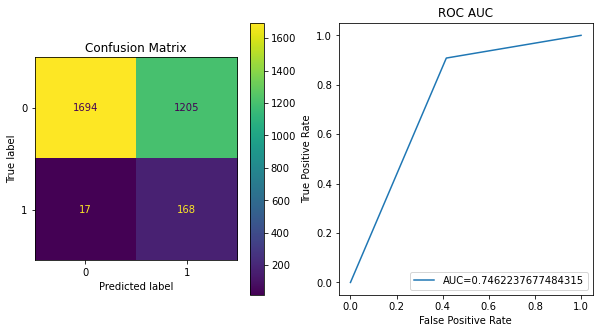

In [127]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit(method="lbfgs")
glm_result(res, X_test, y_test)

# Hypertuning Model With Feature Selection From Chi2

In [128]:
X_train2 = X_train.drop(columns=['Days_Policy_Claim','DayOfWeek','WitnessPresent','WeekOfMonthClaimed','DayOfWeekClaimed','DriverRating','WeekOfMonth','NumberOfCars','RepNumber'])
X_test2 = X_test.drop(columns=['Days_Policy_Claim','DayOfWeek','WitnessPresent','WeekOfMonthClaimed','DayOfWeekClaimed','DriverRating','WeekOfMonth','NumberOfCars','RepNumber'])

In [129]:
# X_over, y_over = sampling(X_train, y_train, 'over', 0.5)
X_under2, y_under2 = sampling(X_train2, y_train, 'under')

## 1. XGBoost

In [130]:
params = {
            'n_estimators':[300], #300
          'max_depth':[8], #8
          'learning_rate':[0.1] #0.1
         }
skf = RepeatedStratifiedKFold(n_splits=3)
xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic',eval_metric='auc')

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=params, scoring='f1', cv=skf)
grid_search_xgb.fit(X_under2, y_under2)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=None, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     i...
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     m

In [131]:
grid_search_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300}

In [132]:
grid_search_xgb.best_score_

0.5039999519862294

<AxesSubplot:>

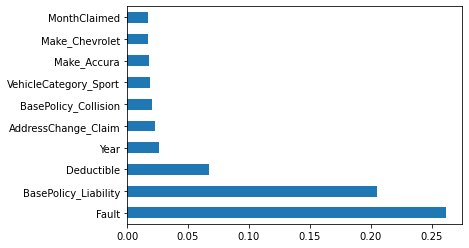

In [133]:
feat_importances = pd.Series(grid_search_xgb.best_estimator_.feature_importances_, index=X_train2.columns)
feat_importances.sort_values(ascending=False).head(10).plot(kind='barh')

F1 Score :  0.2857142857142857
Recall Score :  0.5081081081081081
Precision Score :  0.19873150105708245


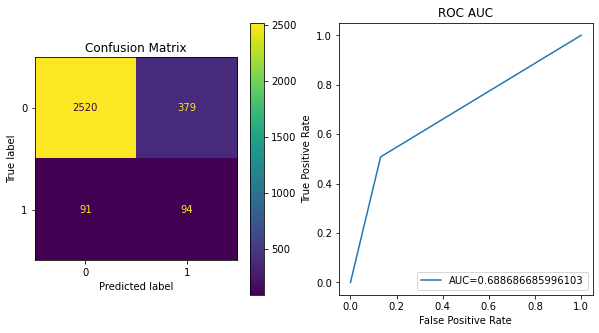

In [134]:
y_pred = grid_search_xgb.predict(X_test2)
metric_result(y_test, y_pred)

## 2. LightGBM

In [135]:
params = {
          'boosting_type':['gbdt'],
          'n_estimators':[300], #300
          'num_leaves':[32], #32
          'learning_rate':[0.01] #0.01
         }
skf = RepeatedStratifiedKFold(n_splits=3)
lgbm = LGBMClassifier(objective= 'binary', class_weight='balanced')

grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=params, scoring='f1', cv=skf)
grid_search_lgbm.fit(X_under2, y_under2)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=LGBMClassifier(class_weight='balanced',
                                      objective='binary'),
             param_grid={'boosting_type': ['gbdt'], 'learning_rate': [0.01],
                         'n_estimators': [300], 'num_leaves': [32]},
             scoring='f1')

In [136]:
grid_search_lgbm.best_params_

{'boosting_type': 'gbdt',
 'learning_rate': 0.01,
 'n_estimators': 300,
 'num_leaves': 32}

In [137]:
grid_search_lgbm.best_score_

0.6153296462131755

<AxesSubplot:>

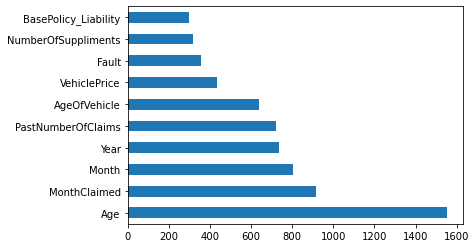

In [138]:
feat_importances = pd.Series(grid_search_lgbm.best_estimator_.feature_importances_, index=X_train2.columns)
feat_importances.sort_values(ascending=False).head(10).plot(kind='barh')

F1 Score :  0.2470414201183432
Recall Score :  0.9027027027027027
Precision Score :  0.143101970865467


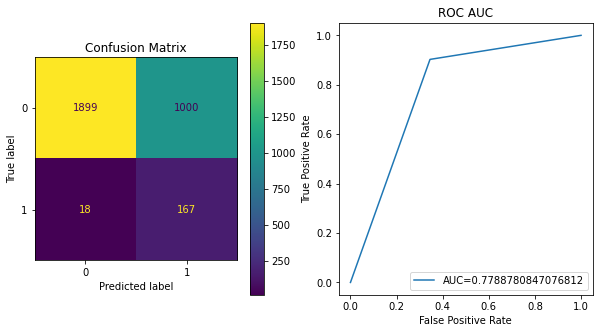

In [139]:
y_pred = grid_search_lgbm.predict(X_test2)
metric_result(y_test, y_pred)

## 3. Decision Tree

In [140]:
params = {
          'criterion':['entropy'],#entropy
          'splitter':['best'],
          'min_samples_split':[4], #4
          'max_features':['auto'] #auto
         }
skf = RepeatedStratifiedKFold(n_splits=3)
dt = DecisionTreeClassifier(class_weight='balanced')

grid_search_dt = GridSearchCV(estimator=dt, param_grid=params, scoring='f1', cv=skf)
grid_search_dt.fit(X_under2, y_under2)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['entropy'], 'max_features': ['auto'],
                         'min_samples_split': [4], 'splitter': ['best']},
             scoring='f1')

In [141]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_split': 4,
 'splitter': 'best'}

In [142]:
grid_search_dt.best_score_

0.4754060357665389

<AxesSubplot:>

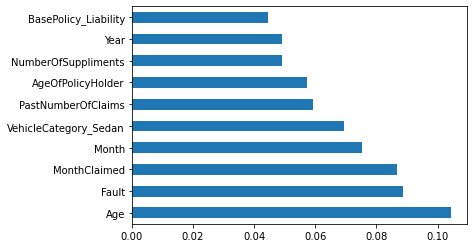

In [143]:
feat_importances = pd.Series(grid_search_dt.best_estimator_.feature_importances_, index=X_train2.columns)
feat_importances.sort_values(ascending=False).head(10).plot(kind='barh')

F1 Score :  0.18785578747628082
Recall Score :  0.5351351351351351
Precision Score :  0.11392405063291139


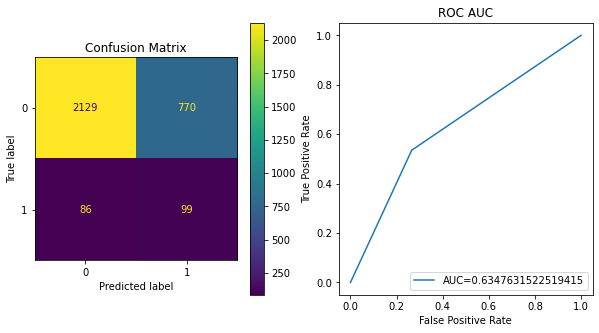

In [144]:
y_pred = grid_search_dt.predict(X_test2)
metric_result(y_test, y_pred)

## 4. Random Forest

In [145]:
params = {
          'n_estimators':[300], #300
          'criterion':['entropy'], #entropy
          'min_samples_split':[2], # 2
          'min_samples_leaf':[4], #4
         }
skf = RepeatedStratifiedKFold(n_splits=3)
rf = RandomForestClassifier(class_weight='balanced')

grid_search_rf = GridSearchCV(estimator=rf, param_grid=params, scoring='f1', cv=skf)
grid_search_rf.fit(X_under2, y_under2)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['entropy'], 'min_samples_leaf': [4],
                         'min_samples_split': [2], 'n_estimators': [300]},
             scoring='f1')

In [146]:
grid_search_rf.best_score_

0.5971737263206899

In [147]:
grid_search_rf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 300}

<AxesSubplot:>

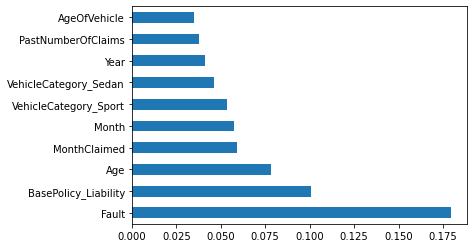

In [148]:
feat_importances = pd.Series(grid_search_rf.best_estimator_.feature_importances_, index=X_train2.columns)
feat_importances.sort_values(ascending=False).head(10).plot(kind='barh')

F1 Score :  0.2570735650767987
Recall Score :  0.8594594594594595
Precision Score :  0.15114068441064638


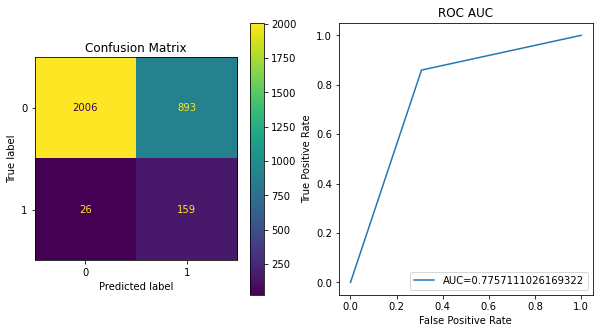

In [149]:
y_pred = grid_search_rf.predict(X_test2)
metric_result(y_test, y_pred)

## 5. Balanced Random Forest

In [150]:
params = {
          'n_estimators':[300], #300
          'criterion':['gini', 'entropy'], #entropy
          'min_samples_split':[2], #2
          'min_samples_leaf':[3], #3
          'max_features':['log2'] #log2
         }
skf = RepeatedStratifiedKFold(n_splits=3)
brf = BalancedRandomForestClassifier(class_weight='balanced')

grid_search_brf = GridSearchCV(estimator=rf, param_grid=params, scoring='f1', cv=skf)
grid_search_brf.fit(X_under2, y_under2)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['log2'], 'min_samples_leaf': [3],
                         'min_samples_split': [2], 'n_estimators': [300]},
             scoring='f1')

In [151]:
grid_search_brf.best_params_

{'criterion': 'entropy',
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [152]:
grid_search_brf.best_score_

0.5934165156703582

<AxesSubplot:>

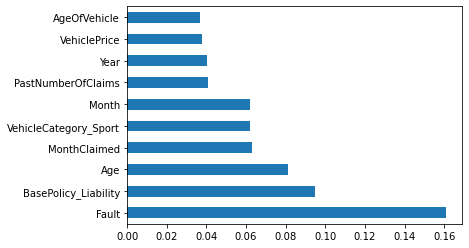

In [153]:
feat_importances = pd.Series(grid_search_brf.best_estimator_.feature_importances_, index=X_train2.columns)
feat_importances.sort_values(ascending=False).head(10).plot(kind='barh')

F1 Score :  0.25689655172413794
Recall Score :  0.8054054054054054
Precision Score :  0.15282051282051282


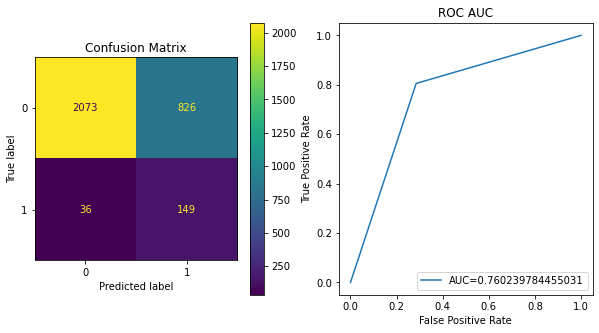

In [154]:
y_pred = grid_search_brf.predict(X_test2)
metric_result(y_test, y_pred)

## 6. GLM

Best Threshold : 0.05
F1 Score :  0.2131461391193363
Recall Score :  0.9027027027027027
Precision Score :  0.12083936324167872


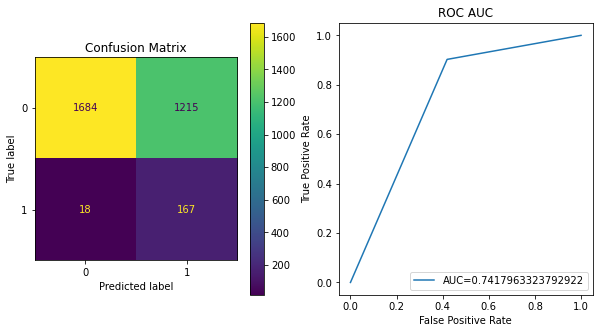

In [155]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Poisson())
res = logm1.fit(method="lbfgs")
glm_result(res, X_test2, y_test)

Best Threshold : 0.05
F1 Score :  0.2157996146435453
Recall Score :  0.9081081081081082
Precision Score :  0.12244897959183673


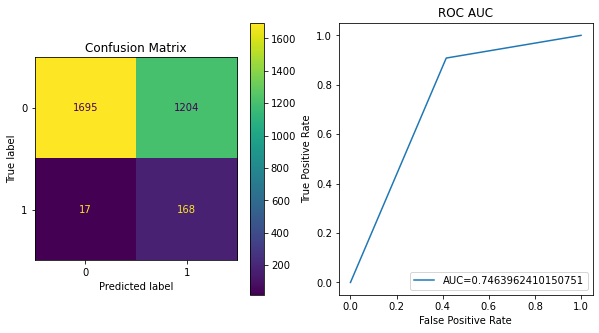

In [156]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
res = logm1.fit(method="lbfgs")
glm_result(res, X_test2, y_test)

# Tuning the Target Weight & the Threshold

In [157]:
# {'class_weight': {0: 0.21391959798994975, 1: 0.7860804020100502}}

## 1. XGBoost

In [158]:
params = {
            'n_estimators':[300], #100
          'max_depth':[8], #6
          'learning_rate':[0.1], #0.2
          'scale_pos_weight':[25]
         }
skf = RepeatedStratifiedKFold(n_splits=3)
xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic',eval_metric='auc')

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=params, scoring='f1', cv=skf)
grid_search_xgb.fit(X_under2, y_under2)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=None, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     i...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                

F1 Score :  0.2660287081339713
Recall Score :  0.7513513513513513
Precision Score :  0.16162790697674417


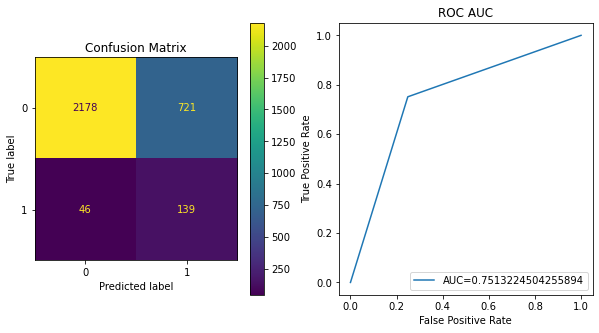

In [159]:
y_pred = grid_search_xgb.predict(X_test2)
metric_result(y_test, y_pred)

Best Threshold : 0.15
F1 Score :  0.25148809523809523
Recall Score :  0.9135135135135135
Precision Score :  0.1458153580672994


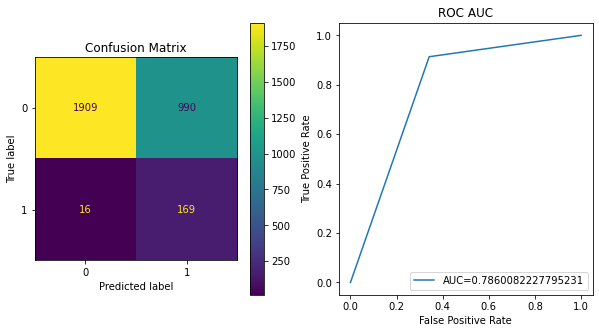

In [160]:
y_pred = grid_search_xgb.predict_proba(X_test2)[:, 1].tolist()
find_best_tresh(y_pred, y_test)

## 2. LightGBM

In [161]:
params = {
          'boosting_type':['gbdt'],
          'n_estimators':[200], #200
          'num_leaves':[32], #31
          'learning_rate':[0.01], #0.02
          'class_weight': [{0: 0.21391959798994975, 1: 0.7860804020100502}]
         }
skf = RepeatedStratifiedKFold(n_splits=3)
lgbm = LGBMClassifier(objective= 'binary')

grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=params, scoring='f1', cv=skf)
grid_search_lgbm.fit(X_under2, y_under2)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=LGBMClassifier(objective='binary'),
             param_grid={'boosting_type': ['gbdt'],
                         'class_weight': [{0: 0.21391959798994975,
                                           1: 0.7860804020100502}],
                         'learning_rate': [0.01], 'n_estimators': [200],
                         'num_leaves': [32]},
             scoring='f1')

F1 Score :  0.2377622377622378
Recall Score :  0.918918918918919
Precision Score :  0.13654618473895583


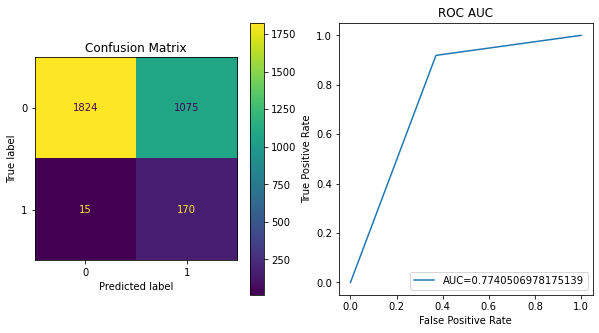

In [162]:
y_pred = grid_search_lgbm.predict(X_test2)
metric_result(y_test, y_pred)

Best Threshold : 0.6
F1 Score :  0.2545168892380204
Recall Score :  0.8756756756756757
Precision Score :  0.1488970588235294


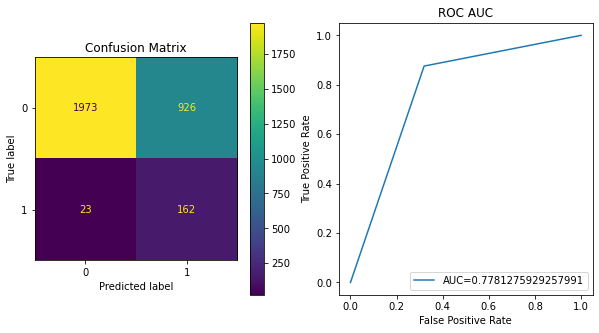

In [163]:
y_pred = grid_search_lgbm.predict_proba(X_test2)[:, 1].tolist()
find_best_tresh(y_pred, y_test)

## 3. Decision Tree

In [164]:
weights = np.linspace(0.0,0.99,200)

params = {
          'criterion':['entropy'],#entropy
          'splitter':['best'],
          'min_samples_split':[4], #4
          'max_features':['auto'], #auto
          'class_weight': [{0: 0.20894472361809047, 1: 0.7910552763819095}]
         }
skf = RepeatedStratifiedKFold(n_splits=3)
dt = DecisionTreeClassifier()

grid_search_dt = GridSearchCV(estimator=dt, param_grid=params, scoring='f1', cv=skf)
grid_search_dt.fit(X_under2, y_under2)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 0.20894472361809047,
                                           1: 0.7910552763819095}],
                         'criterion': ['entropy'], 'max_features': ['auto'],
                         'min_samples_split': [4], 'splitter': ['best']},
             scoring='f1')

F1 Score :  0.22947576656775467
Recall Score :  0.6270270270270271
Precision Score :  0.14043583535108958


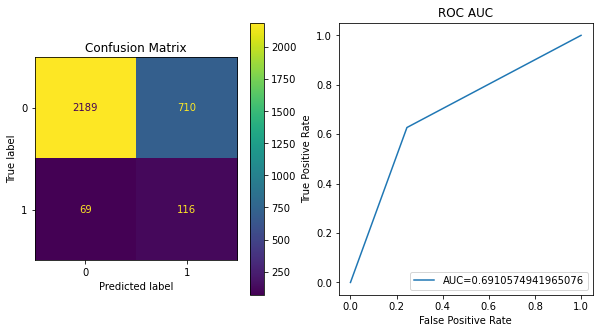

In [165]:
y_pred = grid_search_dt.predict(X_test2)
metric_result(y_test, y_pred)

## 4. Random Forest

In [166]:
params = {
          'n_estimators':[300], #300
          'criterion':['entropy'], #entropy
          'min_samples_split':[2], # 2
          'min_samples_leaf':[4], #4
          'class_weight': [{0: 0.21391959798994975, 1: 0.7860804020100502}]
         }
skf = RepeatedStratifiedKFold(n_splits=3)
rf = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator=rf, param_grid=params, scoring='f1', cv=skf)
grid_search_rf.fit(X_under2, y_under2)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=RandomForestClassifier(),
             param_grid={'class_weight': [{0: 0.21391959798994975,
                                           1: 0.7860804020100502}],
                         'criterion': ['entropy'], 'min_samples_leaf': [4],
                         'min_samples_split': [2], 'n_estimators': [300]},
             scoring='f1')

F1 Score :  0.24501845018450183
Recall Score :  0.8972972972972973
Precision Score :  0.14188034188034188


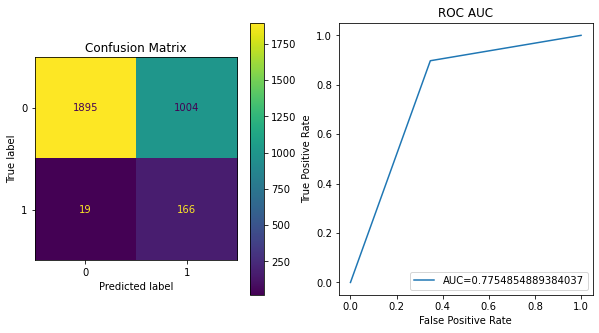

In [167]:
y_pred = grid_search_rf.predict(X_test2)
metric_result(y_test, y_pred)

Best Threshold : 0.45
F1 Score :  0.23777173913043478
Recall Score :  0.9459459459459459
Precision Score :  0.13597513597513597


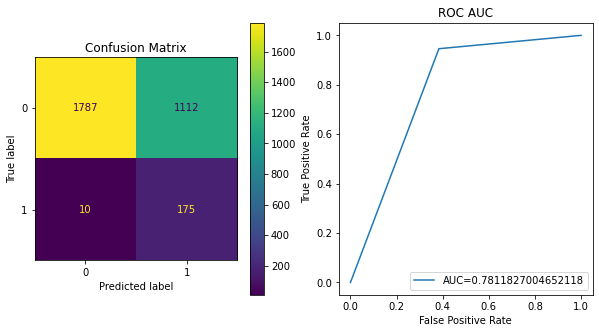

In [168]:
y_pred = grid_search_rf.predict_proba(X_test2)[:, 1].tolist()
find_best_tresh(y_pred, y_test)

## 5. Balanced Random Forest

In [169]:
params = {
          'n_estimators':[300], #300
          'criterion':['entropy'], #entropy
          'min_samples_split':[2], #2
          'min_samples_leaf':[3], #3
          'max_features':['log2'], #log2
          'class_weight': [{0: 0.21391959798994975, 1: 0.7860804020100502}]
         }
skf = RepeatedStratifiedKFold(n_splits=3)
brf = BalancedRandomForestClassifier()

grid_search_brf = GridSearchCV(estimator=rf, param_grid=params, scoring='f1', cv=skf)
grid_search_brf.fit(X_under2, y_under2)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=RandomForestClassifier(),
             param_grid={'class_weight': [{0: 0.21391959798994975,
                                           1: 0.7860804020100502}],
                         'criterion': ['entropy'], 'max_features': ['log2'],
                         'min_samples_leaf': [3], 'min_samples_split': [2],
                         'n_estimators': [300]},
             scoring='f1')

F1 Score :  0.2576112412177986
Recall Score :  0.8918918918918919
Precision Score :  0.15054744525547445


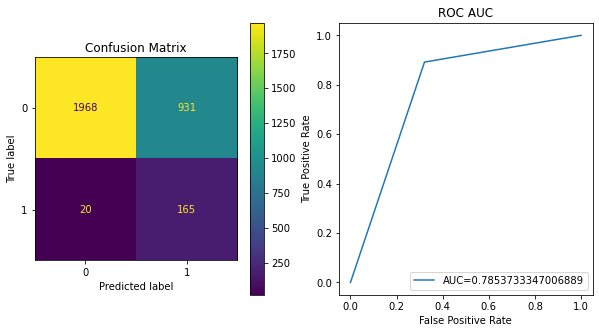

In [170]:
y_pred = grid_search_brf.predict(X_test2)
metric_result(y_test, y_pred)

Best Threshold : 0.5
F1 Score :  0.2576112412177986
Recall Score :  0.8918918918918919
Precision Score :  0.15054744525547445


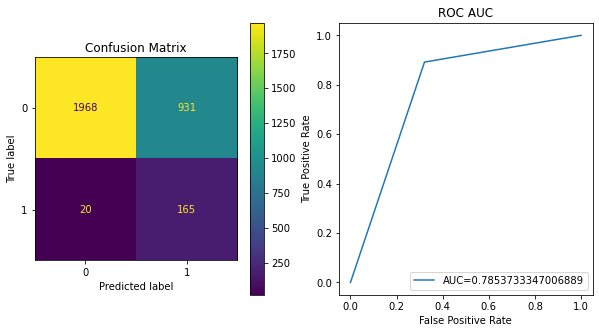

In [171]:
y_pred = grid_search_brf.predict_proba(X_test2)[:, 1].tolist()
find_best_tresh(y_pred, y_test)